
> # Visualization of the datasets
***
<b> libraries </b>

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm



<b> dataset </b>

In [2]:
data_path = {
        "Ace_20": "/beegfs/desy/user/hailudaw/challenge/Datasets/Acevedo_20", # Acevedo_20 Dataset
        "Mat_19": "/beegfs/desy/user/hailudaw/challenge/Datasets/Matek_19", # Matek_19 Dataset
        "WBC1": "/beegfs/desy/user/hailudaw/challenge/Datasets/WBC1" # WBC1 dataset
    }


<b> load metadata </b>

In [4]:
metadata_path = "/beegfs/desy/user/hailudaw/blamad/metadata.csv"  #from the 0_problem_statement.ipynb
metadata2_path = "/beegfs/desy/user/hailudaw/blamad/metadata2.csv"  #from the download script
metadata = pd.read_csv(metadata_path)
metadata2 = pd.read_csv(metadata_path)
metadata.describe()

,mean1,mean2,mean3
count,34203.000000,34203.000000,34203.000000
mean,213.515289,186.209006,199.777906
std,13.403545,13.702025,17.282964
min,101.029803,70.300094,107.004473
25%,207.502263,180.562056,183.132537
50%,215.784163,187.970294,203.798506
75%,222.221606,194.265932,214.642609
max,246.123913,236.508861,241.808871


***
> ### Visualization of the Acevedo_20 dataset


> ### Visualization of the Matek_19 dataset
***


> ### Visualization of the WBC1 dataset

***

In [54]:
from array import array
from random import seed
from torch.utils.data import Dataset, DataLoader

x = []
for i in range(100):
    x.append(metadata['file'][i])
#run metadata here or generate it using the function above
# metadata = metadata_generator(data_path)

eosinophil


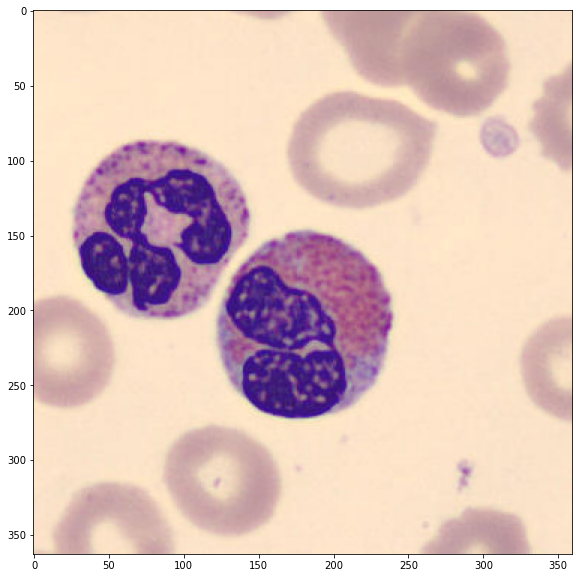

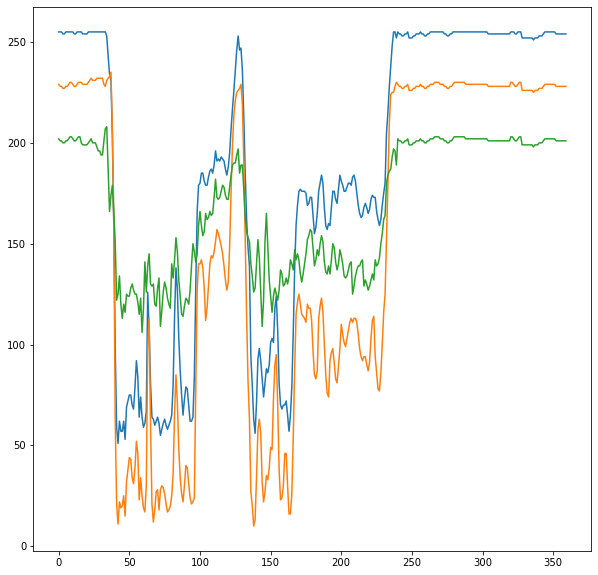

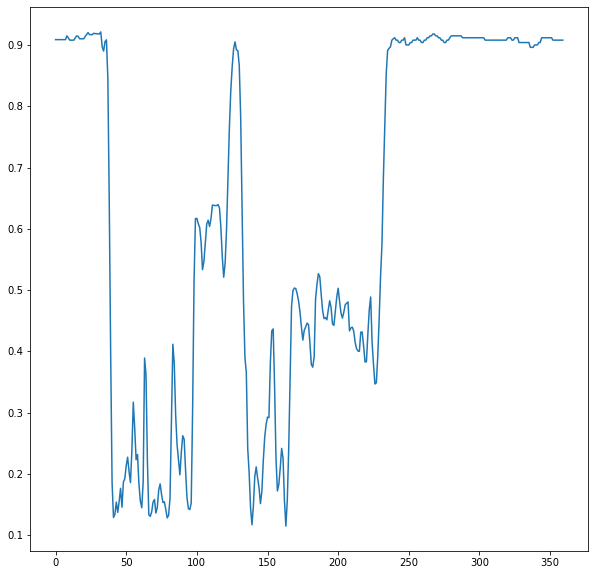

In [76]:
from turtle import title

i = 2000
images = io.imread(metadata['file'][i])
print(metadata['label'][i])
plt.figure(figsize=(10,10))
plt.imshow(images)
plt.show()
plt.figure(figsize=(10,10))
plt.plot(images[images.shape[0]//2])
plt.show()
black_white_image = skimage.color.rgb2gray(images)
plt.figure(figsize=(10,10))
plt.plot(black_white_image[images.shape[1]//2])
plt.show()

In [50]:
import imagej as ij
ij = ij.init()
# ij.ui().showUI()

In [40]:
# Load an image.
# Display the image (backed by matplotlib).
from unittest import findTestCases
import skimage.io as io
image = '/beegfs/desy/user/hailudaw/blamad/Datasets/Acevedo_20/basophil/BA_47.jpg'
imp = ij.io().open(image)
# jimage = ij.io().open(image)

# ij.py.show(image)
# jimage = ij.io().open(image_url)

[INFO] Populating metadata
[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata


In [36]:
def plane(image, pos):
    """
    Slices an image plane at the given position.
    :param image: the image to slice
    :param pos: a dictionary from dimensional axis label to element index for that dimension
    """
    # Convert pos dictionary to position indices in dimension order.
    # See https://stackoverflow.com/q/39474396/1207769.
    p = tuple(pos[image.dims[d]] if image.dims[d] in pos else slice(None) for d in range(image.ndim))
    return image[p]

    import ipywidgets

import ipywidgets
def _axis_index(image, *options):
    axes = tuple(d for d in range(image.ndim) if image.dims[d].lower() in options)
    if len(axes) == 0:
        raise ValueError(f"Image has no {options[0]} axis!")
    return axes[0]

def ndshow(image, cmap=None, x_axis=None, y_axis=None, immediate=False):
    if not hasattr(image, 'dims'):
        # We need dimensional axis labels!
        raise TypeError("Metadata-rich image required")

    # Infer X and/or Y axes as needed.
    if x_axis is None:
        x_axis = _axis_index(image, "x", "col")
    if y_axis is None:
        y_axis = _axis_index(image, "y", "row")

    # Build ipywidgets sliders, one per non-planar dimension.
    widgets = {}
    for d in range(image.ndim):
        if d == x_axis or d == y_axis:
            continue
        label = image.dims[d]
        widgets[label] = ipywidgets.IntSlider(description=label, max=image.shape[d]-1, continuous_update=immediate)

    # Create image plot with interactive sliders.
    def recalc(**kwargs):
        ij.py.show(plane(image, kwargs), cmap=cmap)
    ipywidgets.interact(recalc, **widgets)

# run tubeness op with ij.op().run()
def tubeness_1(image, sigma, calibration=[]):
    return ij.op().run("filter.tubeness", ij.py.jargs(image, sigma, calibration))

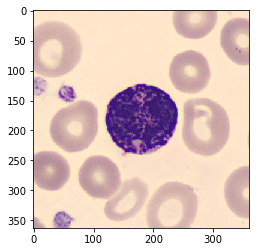

In [28]:
ij.py.show(imp)

In [52]:
# ij.py.show(tubeness_1(imp, 1.0))
ij.py.active_image_plus(imp)

ij.py.active_image_plus() is deprecated. Use ij.py.active_imageplus() instead.


ImportError: The original ImageJ is not available in this environment. The ij.WindowManager class is not available. See: https://github.com/imagej/pyimagej/blob/master/doc/Initialization.md

In [35]:
print(imp.dims)

('X', 'Y')


In [57]:
import imagej
ij = imagej.init()

In [60]:
import imagej
ij = imagej.init('sc.fiji:fiji')

In [62]:
x = ij.scifio().datasetIO().open('/beegfs/desy/user/hailudaw/blamad/Datasets/Acevedo_20/basophil/BA_47.jpg')

[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata


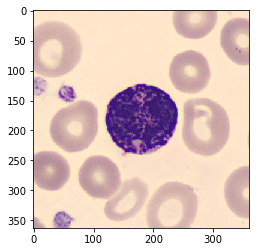

In [66]:
ij.py.show(x)

In [ ]:
ij = imagej.init('/')